In [1]:
import pandas as pd

ratings_path = "../data/raw/ml-100k/u.data"
movies_path = "../data/raw/ml-100k/u.item"

ratings = pd.read_csv(
    ratings_path,
    sep="\t",
    names=["user_id", "item_id", "rating", "timestamp"],
    engine="python"
)

movies = pd.read_csv(
    movies_path,
    sep="|",
    encoding="latin-1",
    header=None,
    names=["movie_id", "title", "release_date", "video_release_date",
           "IMDB_URL", "unknown", "Action", "Adventure", "Animation",
           "Children", "Comedy", "Crime", "Documentary", "Drama",
           "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery",
           "Romance", "Sci-Fi", "Thriller", "War", "Western"]
)

ratings.head(), movies.head()


(   user_id  item_id  rating  timestamp
 0      196      242       3  881250949
 1      186      302       3  891717742
 2       22      377       1  878887116
 3      244       51       2  880606923
 4      166      346       1  886397596,
    movie_id              title release_date  video_release_date  \
 0         1   Toy Story (1995)  01-Jan-1995                 NaN   
 1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
 2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
 3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
 4         5     Copycat (1995)  01-Jan-1995                 NaN   
 
                                             IMDB_URL  unknown  Action  \
 0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
 1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
 2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
 3  http://us.imdb.com/M/title-exact?Get%20Shorty%...

In [2]:
df = ratings.merge(movies, left_on="item_id", right_on="movie_id")
df.head()


,user_id,item_id,rating,timestamp,movie_id,title,release_date,video_release_date,IMDB_URL,unknown,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,891717742,302,L.A. Confidential (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,878887116,377,Heavyweights (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Heavyweights%...,0,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,880606923,51,Legends of the Fall (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Legends%20of%...,0,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,886397596,346,Jackie Brown (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print("Users:", df.user_id.nunique())
print("Movies:", df.movie_id.nunique())
print("Ratings:", len(df))

df.describe()


Users: 943
Movies: 1682
Ratings: 100000


,user_id,item_id,rating,timestamp,movie_id,video_release_date,unknown,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,100000.00000,100000.000000,100000.000000,1.000000e+05,100000.000000,0.0,100000.0000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860,8.835289e+08,425.530130,NaN,0.0001,0.255890,0.137530,0.036050,...,0.013520,0.017330,0.053170,0.049540,0.052450,0.194610,0.12730,0.21872,0.093980,0.018540
std,266.61442,330.798356,1.125674,5.343856e+06,330.798356,NaN,0.0100,0.436362,0.344408,0.186416,...,0.115487,0.130498,0.224373,0.216994,0.222934,0.395902,0.33331,0.41338,0.291802,0.134894
min,1.00000,1.000000,1.000000,8.747247e+08,1.000000,NaN,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,254.00000,175.000000,3.000000,8.794487e+08,175.000000,NaN,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
50%,447.00000,322.000000,4.000000,8.828269e+08,322.000000,NaN,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
75%,682.00000,631.000000,4.000000,8.882600e+08,631.000000,NaN,0.0000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
max,943.00000,1682.000000,5.000000,8.932866e+08,1682.000000,NaN,1.0000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000


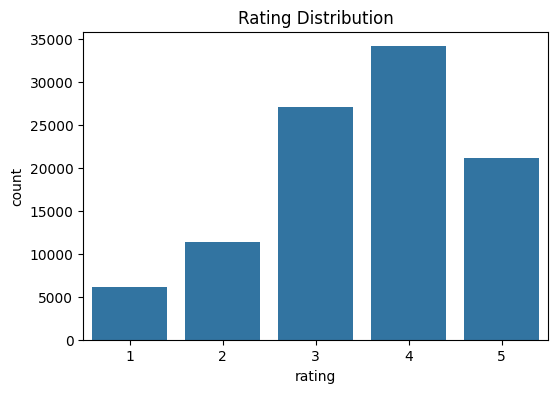

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x=df["rating"])
plt.title("Rating Distribution")
plt.show()


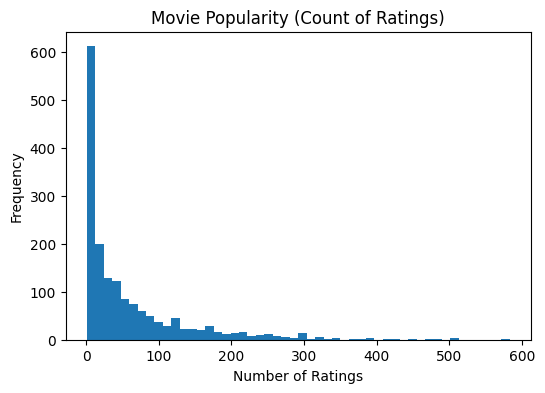

In [5]:
movie_counts = df.groupby("movie_id").size()

plt.figure(figsize=(6,4))
plt.hist(movie_counts, bins=50)
plt.title("Movie Popularity (Count of Ratings)")
plt.xlabel("Number of Ratings")
plt.ylabel("Frequency")
plt.show()


In [6]:
df.to_parquet("../data/processed/ratings_joined.parquet")